In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('weight-height.csv')

In [24]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [25]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [26]:
df.shape

(8555, 3)

In [27]:
from PIL import Image
img = Image.open('out.gif')
img

FileNotFoundError: [Errno 2] No such file or directory: 'out.gif'

<AxesSubplot:xlabel='Weight', ylabel='Count'>

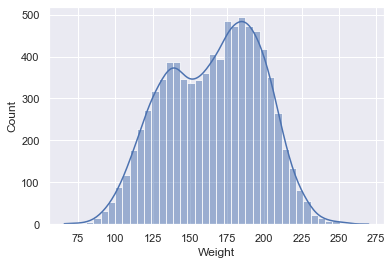

In [29]:
sns.histplot(df["Weight"], kde=True)

In [30]:
mean_value = df['Weight'].mean()

In [31]:
mean_value

165.63273532667586

In [32]:
std_value = df['Weight'].std()

In [33]:
std_value

32.04392221721549

In [36]:
std_3 = mean_value+(2.5*std_value)
std_3

245.74254086971456

In [37]:
neg_std_3 = mean_value - (2.5*std_value)
neg_std_3

85.52292978363714

In [38]:
df[df['Weight'] > std_3]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [39]:
merge = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]

In [40]:
merge.shape

(27, 3)

In [43]:
remove_out_columns = df[(df['Weight']<std_3) & (df['Weight']>neg_std_3)]

In [44]:
remove_out_columns.shape

(8528, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

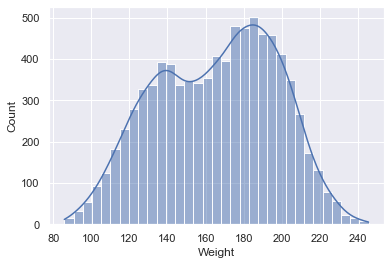

In [45]:
sns.histplot(remove_out_columns['Weight'], kde=True)

# One hot Encoding

In [54]:
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first= True)

In [55]:
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [56]:
new_df = remove_out_columns.drop('Gender', axis=1)

In [57]:
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [58]:
df= pd.concat([new_df,dummy_variables],axis=1)

In [59]:
df

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
8550,60.483946,110.565497,0
8551,63.423372,129.921671,0
8552,65.584057,155.942671,0
8553,67.429971,151.678405,0


In [60]:
x = df.drop('Height',axis=1)

In [61]:
x

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1
...,...,...
8550,110.565497,0
8551,129.921671,0
8552,155.942671,0
8553,151.678405,0


In [62]:
y=df['Height']

In [63]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
8550    60.483946
8551    63.423372
8552    65.584057
8553    67.429971
8554    60.921791
Name: Height, Length: 8528, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [66]:
xtrain.shape

(5969, 2)

In [67]:
xtest.shape

(2559, 2)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lre = LinearRegression()

In [72]:
lre.fit(xtrain,ytrain)

LinearRegression()

In [75]:
lre.coef_

array([ 0.12368722, -0.99863883])

In [77]:
lre.intercept_

46.920637885849125

In [78]:
lre.predict(xtest)

array([66.21313293, 61.53372733, 63.47981906, ..., 70.37833922,
       69.94908919, 69.10116118])

In [79]:
lre.score(xtest,ytest)

0.8535161062270603

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
pred = lre.predict(xtest)

In [83]:
mean_squared_error(ytest,pred)

2.0824049723793894

In [84]:
r2_score(ytest,pred)

0.8535161062270603